# SALT2 MODEL

In [6]:
# LCsimulator https://github.com/mdeatecl/LensedSN124imagesLCs

#!pip install sncosmo
import sncosmo
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
import pandas as pd

printdata = True

nimagel = np.array([2, 1, 1, 4],int) # a sample of 4 systems with n_image = 2, 1, 1, 4 images 
nimage_max=np.max(nimagel)
Nsys=len(nimagel) 

t0 = 55000. #origin
dT = np.array([[0.00, 11.17, 0.00,  0.00],\
               [0.00,  0.00, 0.00,  0.00],\
               [0.00,  0.00, 0.00,  0.00],
               [0.00, 12.71, 23.23, 35.41]],float) # absolute (unobservable) times t_i: i=1,...,n_image

MU = np.array([[1.44,  2.09, 1.00,  1.00],\
               [1.14,  0.00, 0.00,  0.00],\
               [1.18,  0.00, 0.00,  0.00],
               [1.09,  1.35, 1.27,  1.30]],float) # magnifications mu_i: i=1,...,n_image


np.random.seed(202)
seedsn=np.random.randint(0,100000,Nsys)

bands = ('ztfg','ztfr','ztfi')
nbands = len(bands)

nobs = [91,90,30] # total number of observations in g,r,i bands
nobs_max = max(nobs)

dnobs=[1,1,4]
ddnobs=[0.8,0.8,1.2]

obs = -1*np.ones((nbands,nobs_max))

pers=5.0/100                                 #noise level: dafault is 5% the maximum flux
time = []

imfluxes = np.zeros((Nsys,nimage_max,nbands,nobs_max))
Fluxes = np.zeros((Nsys,nbands,nobs_max))
Noises = np.zeros((Nsys,nbands,nobs_max))
NFluxes = np.zeros((Nsys,nbands,nobs_max))
    
for sys in range(Nsys):

    np.random.seed(seedsn[sys])
    model = sncosmo.Model(source='salt2')
    model.set(z=0.4, t0=t0)                 # t0 = 55000.
    
    for j in range(nbands):
        obsv = np.random.poisson(dnobs[j],size=nobs[j])+ddnobs[j]
        for ii in range(1,nobs[j]):
            obsv[ii]=obsv[ii-1]+obsv[ii]
        obs[j,:nobs[j]]= obsv + 54965

        for i in range(nimagel[sys]):
            #individual image fluxes
            time.append(obs[j,:nobs[j]]- dT[sys,i])
            imfluxes[sys,i,j,:nobs[j]] = MU[sys,i]*model.bandflux(bands[j], obs[j,:nobs[j]]-dT[sys,i])
            

    Fluxes = np.sum(imfluxes,axis=1)                                    #Total flux w/o noise 

    for j in range(nbands):
        Noises[sys,j,:] = np.full(nobs_max,pers*np.max(Fluxes[sys,j,:])) #errors
        Noise=np.random.normal(0,Noises)
        #Total flux w/ noise
        NFluxes[sys,j,:nobs[j]] = Fluxes[sys,j,:nobs[j]] + Noise[sys,j,:nobs[j]]

    if printdata:
        
        print('# System:',sys+1)
        print('# Number of images in the system =',nimagel[sys])
        if nimagel[sys]==1:
            dt = 0
            mu = 1
        elif nimagel[sys]==2:
            dt = dT[sys,1]-dT[sys,0]
            mu = MU[sys,1]/MU[sys,0]
        else:
            dt = dT[sys,1:]-dT[sys,0:3]
            mu = MU[sys,1:]/MU[sys,0]            
        print('# Consequitive time delays dt_i:', dt)
        print('# Magnification ratios, mu_i1:', mu) 
        for j in range(nbands):
            print('# '+bands[j]+' data: obs time (JD), total flux(+noise), total flux measurement errors, image_1, image_2, image_3, image_4 ')
            for k in range(nobs[j]):
                print(f'{k+1:3d} {obs[j,k]:7.1f} {NFluxes[sys,j,k]:15.5e} {Noises[sys,j,k]:15.5e}'\
                     +f'{imfluxes[sys,0,j,k]:15.5e} {imfluxes[sys,1,j,k]:15.5e}'\
                     +f'{imfluxes[sys,2,j,k]:15.5e} {imfluxes[sys,3,j,k]:15.5e}')

# System: 1
# Number of images in the system = 2
# Consequitive time delays dt_i: 11.17
# Magnification ratios, mu_i1: 1.4513888888888888
# ztfg data: obs time (JD), total flux(+noise), total flux measurement errors, image_1, image_2, image_3, image_4 
  1 54966.8     4.48454e+00     8.57854e+00    0.00000e+00     0.00000e+00    0.00000e+00     0.00000e+00
  2 54970.6    -8.60800e+00     8.57854e+00    0.00000e+00     0.00000e+00    0.00000e+00     0.00000e+00
  3 54972.4    -4.00054e+00     8.57854e+00   -1.32994e-02     0.00000e+00    0.00000e+00     0.00000e+00
  4 54975.2     7.16494e+00     8.57854e+00   -2.81044e-01     0.00000e+00    0.00000e+00     0.00000e+00
  5 54976.0     5.23483e+00     8.57854e+00   -4.49404e-01     0.00000e+00    0.00000e+00     0.00000e+00
  6 54977.8    -1.80162e+01     8.57854e+00    1.08742e-01     0.00000e+00    0.00000e+00     0.00000e+00
  7 54978.6    -4.55775e+00     8.57854e+00    1.46359e+00     0.00000e+00    0.00000e+00     0.00000e+00
  8 5

In [7]:
print(model)

source:
  class      : SALT2Source
  name       : 'salt2'
  version    : 2.4
  phases     : [-20, .., 50] days
  wavelengths: [2000, .., 9200] Angstroms
parameters:
  z  = 0.4
  t0 = 55000.0
  x0 = 1.0
  x1 = 0.0
  c  = 0.0


## SYSTEM 1: 2 IMAGES

In [8]:
S1I1 = imfluxes[0, 0, :, :]
S1I2 = imfluxes[0, 1, :, :]
S1I3 = imfluxes[0, 2, :, :]
S1I4 = imfluxes[0, 3, :, :]

# Time

timeS1B1 = time[0]
timeS1B2 = time[2]
timeS1B3 = time[4]

# IMAGE 1
fluxS1I1B1 = S1I1[0] 
fluxS1I1B2 = S1I1[1] ; fluxS1I1B2 = fluxS1I1B2[:90]
fluxS1I1B3 = S1I1[2] ; fluxS1I1B3 = fluxS1I1B3[:30]

# IMAGE 2 
fluxS1I2B1 = S1I2[0] 
fluxS1I2B2 = S1I2[1] ; fluxS1I2B2 = fluxS1I2B2[:90]
fluxS1I2B3 = S1I2[2] ; fluxS1I2B3 = fluxS1I2B3[:30]

#error (relatif aux bandes de filtre) (le même pour les deux images)
noiseB1 = Noises[0, 0, 0]
noiseB2 = Noises[0, 1, 0]
noiseB3 = Noises[0, 2, 0]

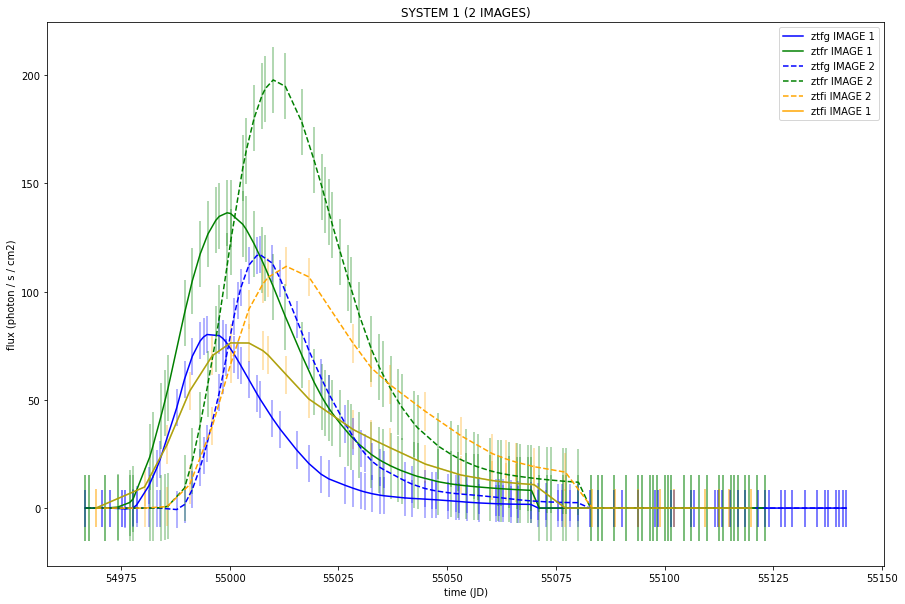

In [9]:
plt.figure(figsize=(15, 10))

# IMAGE 1
# ZTFG
plt.plot(timeS1B1, fluxS1I1B1, color='b', label = 'ztfg IMAGE 1')
plt.errorbar(timeS1B1, fluxS1I1B1, yerr=noiseB1,  fmt='none',  ecolor='b', alpha =0.4)

#ZTGR
plt.plot(timeS1B2, fluxS1I1B2, color='green', label='ztfr IMAGE 1')
plt.errorbar(timeS1B2, fluxS1I1B2, yerr=noiseB2 , fmt='none', ecolor='green', alpha =0.4)

#ZTFI
plt.plot(timeS1B3, fluxS1I1B3, color='orange', label='ztfi IMAGE 1')
plt.errorbar(timeS1B3, fluxS1I1B3, yerr=noiseB3,   ecolor='orange', alpha =0.4)


# IMAGE 2
# ZTFG
plt.plot(timeS1B1, fluxS1I2B1, color='b', label='ztfg IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B1, fluxS1I2B1, yerr=noiseB1,  fmt='none',  ecolor='b', alpha =0.4)

# ZTFR
plt.plot(timeS1B2, fluxS1I2B2, color='g', label='ztfr IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B2, fluxS1I2B2, yerr=noiseB2,  fmt='none',  ecolor='g', alpha =0.4)

# ZTGI
plt.plot(timeS1B3, fluxS1I2B3, color='orange', label='ztfi IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B3, fluxS1I2B3, yerr=noiseB3,  fmt='none',  ecolor='orange', alpha =0.4)

plt.title('SYSTEM 1 (2 IMAGES)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

Pour voir si la colonne des total flux(+noise) correspond à la somme des flux de toutes les images :

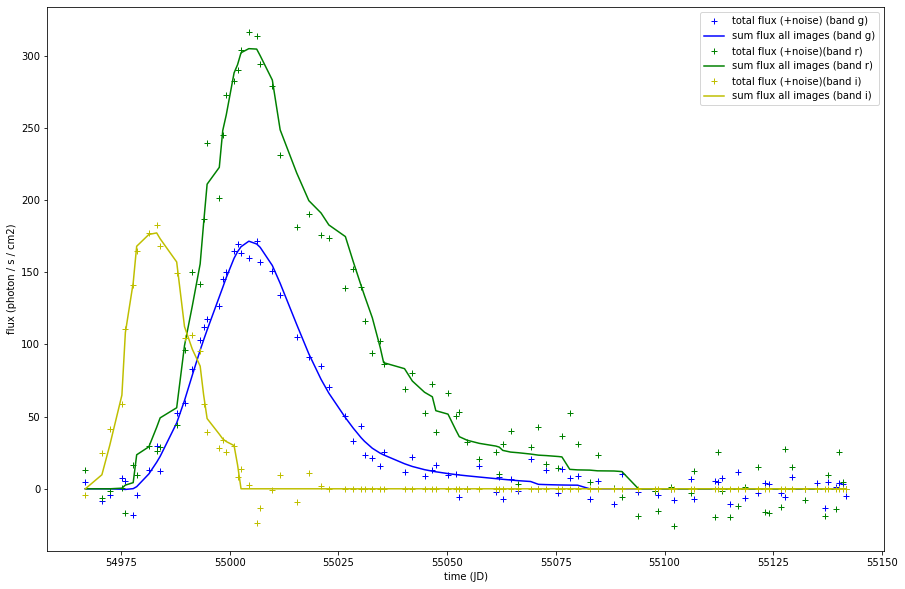

In [10]:
plt.figure(figsize=(15, 10))

# Band g (in blue)

NFS1 = NFluxes[0, :, :]
TfluxG = S1I1[0] + S1I2[0] + S1I3[0] + S1I4[0] 
plt.plot(timeS1B1, NFS1 [0], 'b+', label = 'total flux (+noise) (band g)')
plt.plot(timeS1B1, TfluxG, 'b', label = 'sum flux all images (band g)')

# Band r (in green)

TfluxR = S1I1[1] + S1I2[1] + S1I3[1] + S1I4[1] 
plt.plot(timeS1B1, NFS1 [1], 'g+', label = 'total flux (+noise)(band r)')
plt.plot(timeS1B1, TfluxR, 'g', label = 'sum flux all images (band r)')

# Band i (in yellow)

TfluxI = S1I1[2] + S1I2[2] + S1I3[2] + S1I4[2] 
plt.plot(timeS1B1, NFS1 [2], 'y+', label = 'total flux (+noise)(band i)')
plt.plot(timeS1B1, TfluxI, 'y', label = 'sum flux all images (band i)')

plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend();

### TIME DELAY

In [11]:
TD1FB1 = abs(timeS1B1[np.where(fluxS1I1B1 == fluxS1I1B1.max())[0][0]] - timeS1B1[np.where(fluxS1I2B1 == fluxS1I2B1.max())[0][0]])
TD1FB2 = abs(timeS1B2[np.where(fluxS1I1B2 == fluxS1I1B2.max())[0][0]] - timeS1B2[np.where(fluxS1I2B2 == fluxS1I2B2.max())[0][0]])
TD1FB3 = abs(timeS1B3[np.where(fluxS1I1B3 == fluxS1I1B3.max())[0][0]] - timeS1B3[np.where(fluxS1I2B3 == fluxS1I2B3.max())[0][0]])

d = [ ["Time delay" ,        TD1FB1,  TD1FB2, TD1FB3, (TD1FB1+TD1FB2+TD1FB3)/3]]

df = pd.DataFrame(d, columns = ["   ",'Band g','Band r', 'Band i', 'Mean'])
print(df)

               Band g  Band r  Band i       Mean
0  Time delay    12.2    10.6    12.8  11.866667


## SYSTEM 4: 4 IMAGES

In [12]:
S4I1 = imfluxes[3, 0, :, :]
S4I2 = imfluxes[3, 1, :, :]
S4I3 = imfluxes[3, 2, :, :]
S4I4 = imfluxes[3, 3, :, :]

# Time

timeS4B1 = time[12]
timeS4B2 = time[16]
timeS4B3 = time[20]

# IMAGE 1
fluxS4I1B1 = S4I1[0] 
fluxS4I1B2 = S4I1[1] ; fluxS4I1B2 = fluxS4I1B2[:90]
fluxS4I1B3 = S4I1[2] ; fluxS4I1B3 = fluxS4I1B3[:30]

# IMAGE 2 
fluxS4I2B1 = S4I2[0] 
fluxS4I2B2 = S4I2[1] ; fluxS4I2B2 = fluxS4I2B2[:90]
fluxS4I2B3 = S4I2[2] ; fluxS4I2B3 = fluxS4I2B3[:30]

# IMAGE 3
fluxS4I3B1 = S4I3[0] 
fluxS4I3B2 = S4I3[1] ; fluxS4I3B2 = fluxS4I3B2[:90]
fluxS4I3B3 = S4I3[2] ; fluxS4I3B3 = fluxS4I3B3[:30]

# IMAGE 4
fluxS4I4B1 = S4I4[0] 
fluxS4I4B2 = S4I4[1] ; fluxS4I4B2 = fluxS4I4B2[:90]
fluxS4I4B3 = S4I4[2] ; fluxS4I4B3 = fluxS4I4B3[:30]

#error (relatif aux bandes de filtre) 
noiseS4B1 = Noises[3, 0, 0]
noiseS4B2 = Noises[3, 1, 0]
noiseS4B3 = Noises[3, 2, 0]

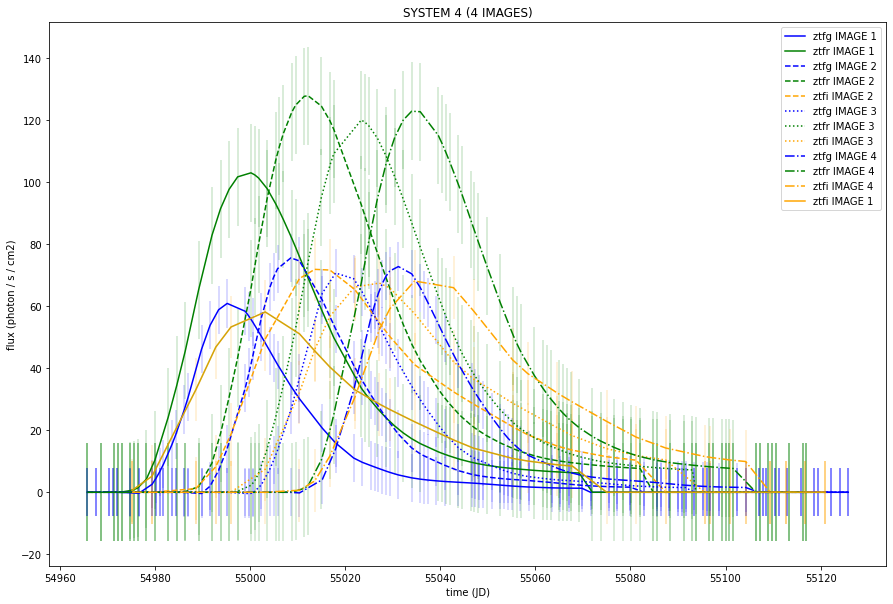

In [13]:
plt.figure(figsize=(15, 10))

# IMAGE 1

# ZTFG
plt.plot(timeS4B1, fluxS4I1B1, color='b', label = 'ztfg IMAGE 1')
plt.errorbar(timeS4B1, fluxS4I1B1, yerr=noiseS4B1,  fmt='none',  ecolor='b', alpha =0.2)

#ZTGR
plt.plot(timeS4B2, fluxS4I1B2, color='green', label='ztfr IMAGE 1')
plt.errorbar(timeS4B2, fluxS4I1B2, yerr=noiseS4B2 , fmt='none', ecolor='green', alpha =0.2)

#ZTFI
plt.plot(timeS4B3, fluxS4I1B3, color='orange', label='ztfi IMAGE 1')
plt.errorbar(timeS4B3, fluxS4I1B3, yerr=noiseS4B3,   ecolor='orange', alpha =0.2)


# IMAGE 2
# ZTFG
plt.plot(timeS4B1, fluxS4I2B1, color='b', label='ztfg IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS4B1, fluxS4I2B1, yerr=noiseS4B1,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(timeS4B2, fluxS4I2B2, color='g', label='ztfr IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS4B2, fluxS4I2B2, yerr=noiseS4B2,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(timeS4B3, fluxS4I2B3, color='orange', label='ztfi IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS4B3, fluxS4I2B3, yerr=noiseS4B3,  fmt='none',  ecolor='orange', alpha =0.2)


# IMAGE 3
# ZTFG
plt.plot(timeS4B1, fluxS4I3B1, color='b', label='ztfg IMAGE 3', linestyle = 'dotted')
plt.errorbar(timeS4B1, fluxS4I3B1, yerr=noiseS4B1,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(timeS4B2, fluxS4I3B2, color='g', label='ztfr IMAGE 3', linestyle = 'dotted')
plt.errorbar(timeS4B2, fluxS4I3B2, yerr=noiseS4B2,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(timeS4B3, fluxS4I3B3, color='orange', label='ztfi IMAGE 3', linestyle = 'dotted')
plt.errorbar(timeS4B3, fluxS4I3B3, yerr=noiseS4B3,  fmt='none',  ecolor='orange', alpha =0.2)


# IMAGE 4
# ZTFG
plt.plot(timeS4B1, fluxS4I4B1, color='b', label='ztfg IMAGE 4', linestyle = '-.')
plt.errorbar(timeS4B1, fluxS4I4B1, yerr=noiseS4B1,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(timeS4B2, fluxS4I4B2, color='g', label='ztfr IMAGE 4', linestyle = '-.')
plt.errorbar(timeS4B2, fluxS4I4B2, yerr=noiseS4B2,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(timeS4B3, fluxS4I4B3, color='orange', label='ztfi IMAGE 4', linestyle = '-.')
plt.errorbar(timeS4B3, fluxS4I4B3, yerr=noiseS4B3,  fmt='none',  ecolor='orange', alpha =0.2)


plt.title('SYSTEM 4 (4 IMAGES)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

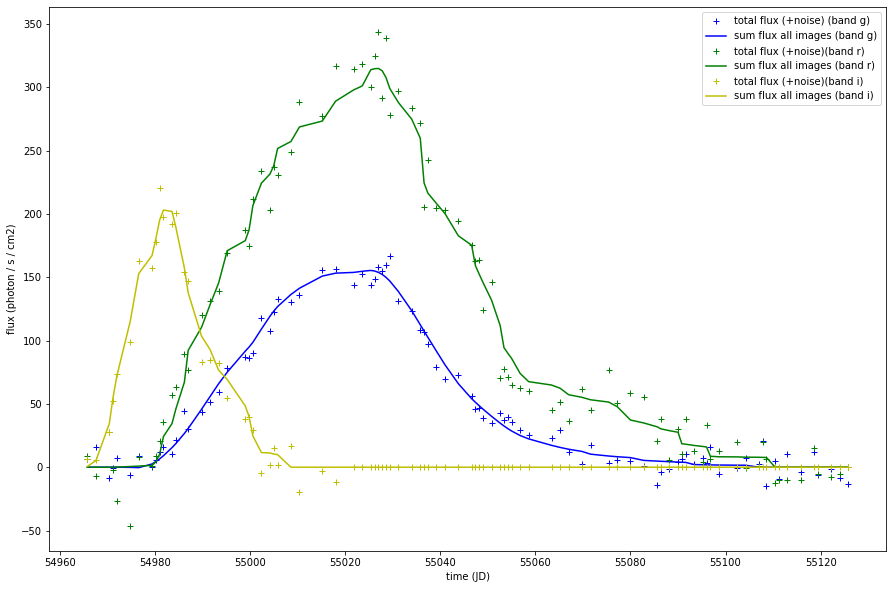

In [14]:
plt.figure(figsize=(15, 10))

# Band g (in blue)

NFS4 = NFluxes[3, :, :]
TfluxG4 = S4I1[0] + S4I2[0] + S4I3[0] + S4I4[0] 
plt.plot(timeS4B1, NFS4[0], 'b+', label = 'total flux (+noise) (band g)')
plt.plot(timeS4B1, TfluxG4, 'b', label = 'sum flux all images (band g)')

# Band r (in green)

TfluxR4 = S4I1[1] + S4I2[1] + S4I3[1] + S4I4[1] 
plt.plot(timeS4B1, NFS4[1], 'g+', label = 'total flux (+noise)(band r)')
plt.plot(timeS4B1, TfluxR4, 'g', label = 'sum flux all images (band r)')

# Band i (in yellow)

TfluxI4 = S4I1[2] + S4I2[2] + S4I3[2] + S4I4[2] 
plt.plot(timeS4B1, NFS4[2], 'y+', label = 'total flux (+noise)(band i)')
plt.plot(timeS4B1, TfluxI4, 'y', label = 'sum flux all images (band i)')

plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend();

### TIME DELAY

In [15]:
# Time delay between the 1st and 2nd images

TD1FB1 = abs(timeS4B1[np.where(fluxS4I1B1 == fluxS4I1B1.max())[0][0]] - timeS4B1[np.where(fluxS4I2B1 == fluxS4I2B1.max())[0][0]])
TD1FB2 = abs(timeS4B2[np.where(fluxS4I1B2 == fluxS4I1B2.max())[0][0]] - timeS4B2[np.where(fluxS4I2B2 == fluxS4I2B2.max())[0][0]])
TD1FB3 = abs(timeS4B3[np.where(fluxS4I1B3 == fluxS4I1B3.max())[0][0]] - timeS4B3[np.where(fluxS4I2B3 == fluxS4I2B3.max())[0][0]])


# Time delay between the 2nd and 3rd images

TD2FB1 = abs(timeS4B1[np.where(fluxS4I2B1 == fluxS4I2B1.max())[0][0]] - timeS4B1[np.where(fluxS4I3B1 == fluxS4I3B1.max())[0][0]])
TD2FB2 = abs(timeS4B2[np.where(fluxS4I2B2 == fluxS4I2B2.max())[0][0]] - timeS4B2[np.where(fluxS4I3B2 == fluxS4I3B2.max())[0][0]])
TD2FB3 = abs(timeS4B3[np.where(fluxS4I2B3 == fluxS4I2B3.max())[0][0]] - timeS4B3[np.where(fluxS4I3B3 == fluxS4I3B3.max())[0][0]])


# Time delay between the 3rd and 4th images

TD3FB1 = abs(timeS4B1[np.where(fluxS4I3B1 == fluxS4I3B1.max())[0][0]] - timeS4B1[np.where(fluxS4I4B1 == fluxS4I4B1.max())[0][0]])
TD3FB2 = abs(timeS4B2[np.where(fluxS4I3B2 == fluxS4I3B2.max())[0][0]] - timeS4B2[np.where(fluxS4I4B2 == fluxS4I4B2.max())[0][0]])
TD3FB3 = abs(timeS4B3[np.where(fluxS4I3B3 == fluxS4I3B3.max())[0][0]] - timeS4B3[np.where(fluxS4I4B3 == fluxS4I4B3.max())[0][0]])


d = [ ["Time delay between 1-2 images" ,  TD1FB1,  TD1FB2, TD1FB3],
      ["Time delay between 2-3 images",  TD2FB1, TD2FB2, TD2FB3],
      ["Time delay between 3-4 images",  TD3FB1, TD3FB2, TD3FB3 ]]

df = pd.DataFrame(d, columns = ["   ",'Band g','Band r', 'Band i'])
print(df)

                                  Band g  Band r  Band i
0  Time delay between 1-2 images    13.4    12.0    10.4
1  Time delay between 2-3 images     9.4    11.2    13.6
2  Time delay between 3-4 images    13.2    10.6     7.4


## SYSTEM 2: 1 IMAGE 

In [16]:
S2I1 = imfluxes[1, 0, :, :]

# Time

timeS2B1 = time[6]
timeS2B2 = time[7]
timeS2B3 = time[8]

# IMAGE 1
fluxS2I1B1 = S2I1[0] 
fluxS2I1B2 = S2I1[1] ; fluxS2I1B2 = fluxS2I1B2[:90]
fluxS2I1B3 = S2I1[2] ; fluxS2I1B3 = fluxS2I1B3[:30]

#error (relatif aux bandes de filtre) 
noiseS2B1 = Noises[1, 0, 0]
noiseS2B2 = Noises[1, 1, 0]
noiseS2B3 = Noises[1, 2, 0]

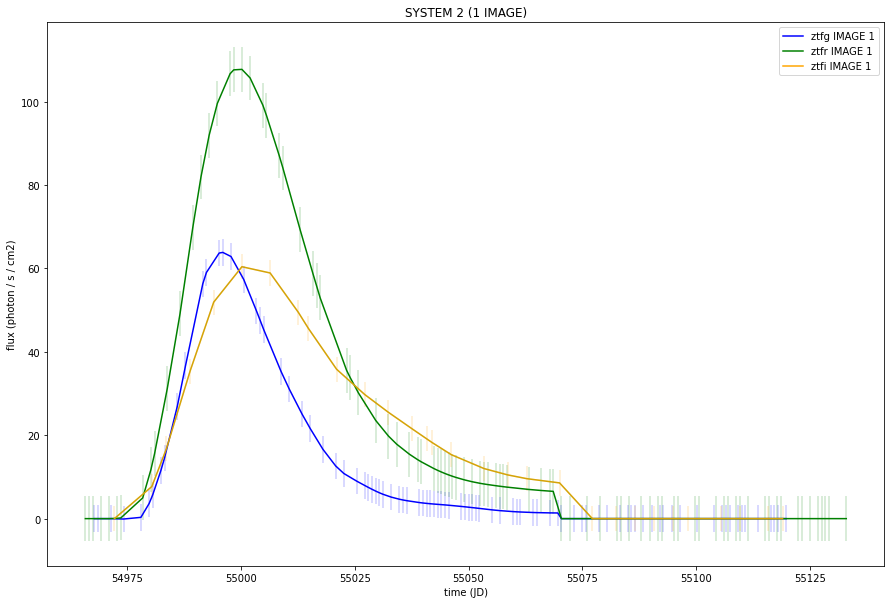

In [17]:
plt.figure(figsize=(15, 10))

# IMAGE 1

# ZTFG
plt.plot(timeS2B1, fluxS2I1B1, color='b', label = 'ztfg IMAGE 1')
plt.errorbar(timeS2B1, fluxS2I1B1, yerr=noiseS2B1,  fmt='none',  ecolor='b', alpha =0.2)

#ZTGR
plt.plot(timeS2B2, fluxS2I1B2, color='green', label='ztfr IMAGE 1')
plt.errorbar(timeS2B2, fluxS2I1B2, yerr=noiseS2B2 , fmt='none', ecolor='green', alpha =0.2)

#ZTFI
plt.plot(timeS2B3, fluxS2I1B3, color='orange', label='ztfi IMAGE 1')
plt.errorbar(timeS2B3, fluxS2I1B3, yerr=noiseS2B3,   ecolor='orange', alpha =0.2)

plt.title('SYSTEM 2 (1 IMAGE)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

## SYSTEM 205 ZIP FILE

In [ ]:
# BAND g 
Time_g = []
TF_noise_g = []
Tmeas_error_g = []
I1F_g = []
I2F_g = []
I3F_g = []
I4F_g = []
with open('gslsne_data/gslsne_multimage3bandsys_205_ztfg.txt', 'r') as f:

    for l in f:
        data = [str(d) for d in l.split(" ")]
        Time_g.append(float(data[0]))
        TF_noise_g.append(float(data[1]))
        Tmeas_error_g.append(float(data[2]))
        I1F_g.append(float(data[3]))
        I2F_g.append(float(data[4]))
        I3F_g.append(float(data[5]))
        I4F_g.append(float(data[6]))

f.close()


# BAND i 
Time_i = []
TF_noise_i = []
Tmeas_error_i = []
I1F_i = []
I2F_i = []
I3F_i = []
I4F_i = []
with open('gslsne_data/gslsne_multimage3bandsys_205_ztfi.txt', 'r') as f:

    for l in f:
        data = [str(d) for d in l.split(" ")]
        Time_i.append(float(data[0]))
        TF_noise_i.append(float(data[1]))
        Tmeas_error_i.append(float(data[2]))
        I1F_i.append(float(data[3]))
        I2F_i.append(float(data[4]))
        I3F_i.append(float(data[5]))
        I4F_i.append(float(data[6]))
        
f.close()

        
# BAND r 
Time_r = []
TF_noise_r = []
Tmeas_error_r = []
I1F_r = []
I2F_r = []
I3F_r = []
I4F_r = []
with open('gslsne_data/gslsne_multimage3bandsys_205_ztfr.txt', 'r') as f:

    for l in f:
        data = [str(d) for d in l.split(" ")]
        Time_r.append(float(data[0]))
        TF_noise_r.append(float(data[1]))
        Tmeas_error_r.append(float(data[2]))
        I1F_r.append(float(data[3]))
        I2F_r.append(float(data[4]))
        I3F_r.append(float(data[5]))
        I4F_r.append(float(data[6]))
        
f.close()

In [ ]:
plt.figure(figsize=(15, 9))

# IMAGE 1

# ZTFG
plt.plot(Time_g, I1F_g, color='b', label = 'ztfg IMAGE 1')
plt.errorbar(Time_g, I1F_g, yerr=Tmeas_error_g,  fmt='none',  ecolor='b', alpha =0.2)

#ZTGR
plt.plot(Time_r, I1F_r, color='green', label='ztfr IMAGE 1')
plt.errorbar(Time_r, I1F_r, yerr=Tmeas_error_r , fmt='none', ecolor='green', alpha =0.2)

#ZTFI
plt.plot(Time_i, I1F_i, color='orange', label='ztfi IMAGE 1')
plt.errorbar(Time_i, I1F_i, yerr=Tmeas_error_i,   ecolor='orange', alpha =0.2)


# IMAGE 2
# ZTFG
plt.plot(Time_g, I2F_g, color='b', label='ztfg IMAGE 2', linestyle = 'dashed')
plt.errorbar(Time_g, I2F_g, yerr=Tmeas_error_g,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(Time_r, I2F_r, color='g', label='ztfr IMAGE 2', linestyle = 'dashed')
plt.errorbar(Time_r, I2F_r, yerr=Tmeas_error_r,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(Time_i, I2F_i, color='orange', label='ztfi IMAGE 2', linestyle = 'dashed')
plt.errorbar(Time_i, I2F_i, yerr=Tmeas_error_i,  fmt='none',  ecolor='orange', alpha =0.2)


# IMAGE 3
# ZTFG
plt.plot(Time_g, I3F_g, color='b', label='ztfg IMAGE 3', linestyle = 'dotted')
plt.errorbar(Time_g, I3F_g, yerr=Tmeas_error_g,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(Time_r, I3F_r, color='g', label='ztfr IMAGE 3', linestyle = 'dotted')
plt.errorbar(Time_r, I3F_r, yerr=Tmeas_error_r,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(Time_i, I3F_i, color='orange', label='ztfi IMAGE 3', linestyle = 'dotted')
plt.errorbar(Time_i, I3F_i, yerr=Tmeas_error_i,  fmt='none',  ecolor='orange', alpha =0.2)


# IMAGE 4
# ZTFG
plt.plot(Time_g, I4F_g, color='b', label='ztfg IMAGE 4', linestyle = '-.')
plt.errorbar(Time_g, I4F_g, yerr=Tmeas_error_g,  fmt='none',  ecolor='b', alpha =0.2)

# ZTFR
plt.plot(Time_r, I4F_r, color='g', label='ztfr IMAGE 4', linestyle = '-.')
plt.errorbar(Time_r, I4F_r, yerr=Tmeas_error_r,  fmt='none',  ecolor='g', alpha =0.2)

# ZTGI
plt.plot(Time_i, I4F_i, color='orange', label='ztfi IMAGE 4', linestyle = '-.')
plt.errorbar(Time_i, I4F_i, yerr=Tmeas_error_i,  fmt='none',  ecolor='orange', alpha =0.2)


plt.title('SYSTEM 4 (4 IMAGES)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

In [ ]:
# Time delay between the 1st and 2nd images

TDI1B1 = abs(Time_g[np.argmax(I1F_g)] - Time_g[np.argmax(I2F_g)])
TDI1B2 = abs(Time_r[np.argmax(I1F_r)] - Time_r[np.argmax(I2F_r)])
TDI1B3 = abs(Time_i[np.argmax(I1F_i)] - Time_i[np.argmax(I2F_i)])


# Time delay between the 2nd and 3rd images

TDI2B1 = abs(Time_g[np.argmax(I2F_g)] - Time_g[np.argmax(I3F_g)])
TDI2B2 = abs(Time_r[np.argmax(I2F_r)] - Time_r[np.argmax(I3F_r)])
TDI2B3 = abs(Time_i[np.argmax(I2F_i)] - Time_i[np.argmax(I3F_i)])


# Time delay between the 3rd and 4th images

TDI3B1 = abs(Time_g[np.argmax(I3F_g)] - Time_g[np.argmax(I4F_g)])
TDI3B2 = abs(Time_r[np.argmax(I3F_r)] - Time_r[np.argmax(I4F_r)])
TDI3B3 = abs(Time_i[np.argmax(I3F_i)] - Time_i[np.argmax(I4F_i)])



d = [ ["Time delay between 1-2 images" ,  TDI1B1,  TDI1B2, TDI1B3],
      ["Time delay between 2-3 images",  TDI2B1, TDI2B2, TDI2B3],
      ["Time delay between 3-4 images",  TDI3B1, TDI3B2, TDI3B3 ]]

df = pd.DataFrame(d, columns = ["   ",'Band g','Band r', 'Band i'])
print(df)

.

# HSIAO MODEL

In [18]:
obsH = -1*np.ones((nbands,nobs_max))
timeH = []
imfluxesH = np.zeros((Nsys,nimage_max,nbands,nobs_max))
FluxesH = np.zeros((Nsys,nbands,nobs_max))
NoisesH = np.zeros((Nsys,nbands,nobs_max))
NFluxesH = np.zeros((Nsys,nbands,nobs_max))
    
    
for sys in range(Nsys):

    np.random.seed(seedsn[sys])
    model = sncosmo.Model(source='hsiao')
    model.set(z=0.4, t0=t0, amplitude=1.e-4)      # The amplitude is the only variable that differs with the SALT2 model
    
    for j in range(nbands):
        obsv = np.random.poisson(dnobs[j],size=nobs[j])+ddnobs[j]
        for ii in range(1,nobs[j]):
            obsv[ii]=obsv[ii-1]+obsv[ii]
        obsH[j,:nobs[j]]= obsv + 54965

        for i in range(nimagel[sys]):
            #individual image fluxes
            timeH.append(obsH[j,:nobs[j]]- dT[sys,i])
            imfluxesH[sys,i,j,:nobs[j]] = MU[sys,i]*model.bandflux(bands[j], obsH[j,:nobs[j]]-dT[sys,i])
            

    FluxesH = np.sum(imfluxes,axis=1)                                    #Total flux w/o noise 

    for j in range(nbands):
        NoisesH[sys,j,:] = np.full(nobs_max,pers*np.max(FluxesH[sys,j,:])) #errors
        NoiseH=np.random.normal(0,NoisesH)
        #Total flux w/ noise
        NFluxesH[sys,j,:nobs[j]] = FluxesH[sys,j,:nobs[j]] + NoiseH[sys,j,:nobs[j]]

    if printdata:
        
        if nimagel[sys]==1:
            dt = 0
            mu = 1
        elif nimagel[sys]==2:
            dt = dT[sys,1]-dT[sys,0]
            mu = MU[sys,1]/MU[sys,0]
        else:
            dt = dT[sys,1:]-dT[sys,0:3]
            mu = MU[sys,1:]/MU[sys,0]            

## SYSTEM 1: 2 IMAGES

In [19]:
S1I1H = imfluxesH[0, 0, :, :]
S1I2H = imfluxesH[0, 1, :, :]
S1I3H = imfluxesH[0, 2, :, :]
S1I4H = imfluxesH[0, 3, :, :]

# Time

timeS1B1H = timeH[0]
timeS1B2H = timeH[2]
timeS1B3H = timeH[4]

# IMAGE 1
fluxS1I1B1H = S1I1H[0] 
fluxS1I1B2H = S1I1H[1] ; fluxS1I1B2H = fluxS1I1B2H[:90]
fluxS1I1B3H = S1I1H[2] ; fluxS1I1B3H = fluxS1I1B3H[:30]

# IMAGE 2 
fluxS1I2B1H = S1I2H[0] 
fluxS1I2B2H = S1I2H[1] ; fluxS1I2B2H = fluxS1I2B2H[:90]
fluxS1I2B3H = S1I2H[2] ; fluxS1I2B3H = fluxS1I2B3H[:30]

#error (relatif aux bandes de filtre) (le même pour les deux images)
noiseB1H = NoisesH[0, 0, 0]
noiseB2H = NoisesH[0, 1, 0]
noiseB3H = NoisesH[0, 2, 0]

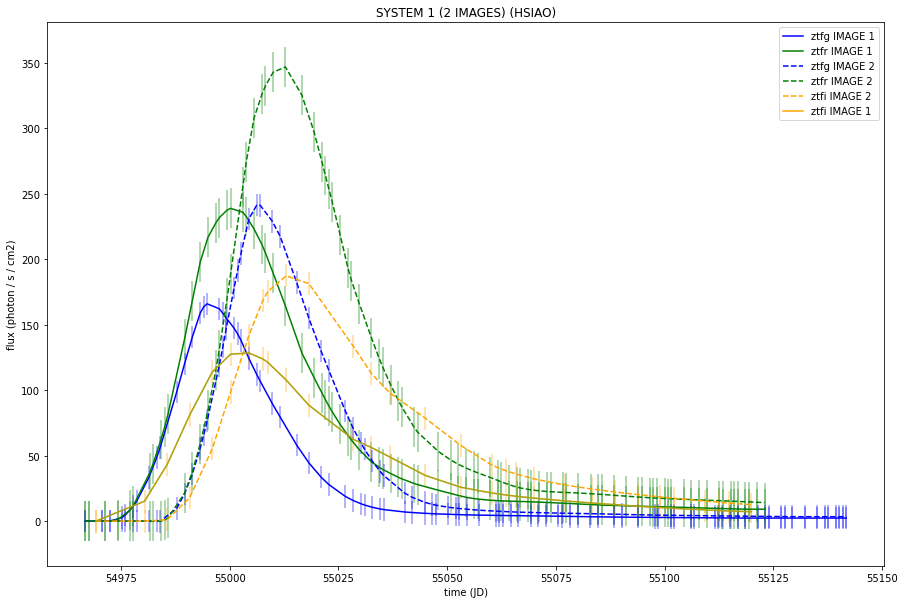

In [20]:
plt.figure(figsize=(15, 10))

# IMAGE 1
# ZTFG
plt.plot(timeS1B1H, fluxS1I1B1H, color='b', label = 'ztfg IMAGE 1')
plt.errorbar(timeS1B1H, fluxS1I1B1H, yerr=noiseB1H,  fmt='none',  ecolor='b', alpha =0.4)

#ZTGR
plt.plot(timeS1B2H, fluxS1I1B2H, color='green', label='ztfr IMAGE 1')
plt.errorbar(timeS1B2H, fluxS1I1B2H, yerr=noiseB2H, fmt='none', ecolor='green', alpha =0.4)

#ZTFI
plt.plot(timeS1B3H, fluxS1I1B3H, color='orange', label='ztfi IMAGE 1')
plt.errorbar(timeS1B3H, fluxS1I1B3H, yerr=noiseB3H,   ecolor='orange', alpha =0.4)


# IMAGE 2
# ZTFG
plt.plot(timeS1B1H, fluxS1I2B1H, color='b', label='ztfg IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B1H, fluxS1I2B1H, yerr=noiseB1H,  fmt='none',  ecolor='b', alpha =0.4)

# ZTFR
plt.plot(timeS1B2H, fluxS1I2B2H, color='g', label='ztfr IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B2H, fluxS1I2B2H, yerr=noiseB2H,  fmt='none',  ecolor='g', alpha =0.4)

# ZTGI
plt.plot(timeS1B3H, fluxS1I2B3H, color='orange', label='ztfi IMAGE 2', linestyle = 'dashed')
plt.errorbar(timeS1B3H, fluxS1I2B3H, yerr=noiseB3H,  fmt='none',  ecolor='orange', alpha =0.4)

plt.title('SYSTEM 1 (2 IMAGES) (HSIAO)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

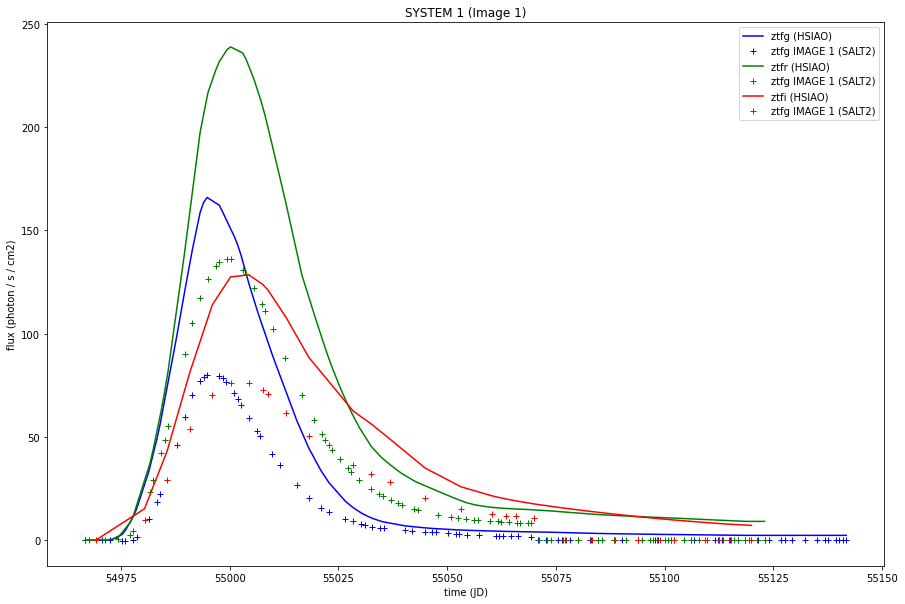

In [39]:
plt.figure(figsize=(15, 10))

# IMAGE 1
# ZTFG
plt.plot(timeS1B1H, fluxS1I1B1H, color='b', label = 'ztfg (HSIAO)')
plt.plot(timeS1B1, fluxS1I1B1, 'b+', label = 'ztfg IMAGE 1 (SALT2)')

#ZTGR
plt.plot(timeS1B2H, fluxS1I1B2H, color='green', label='ztfr (HSIAO)')
plt.plot(timeS1B2, fluxS1I1B2, 'g+', label = 'ztfg IMAGE 1 (SALT2)')

#ZTFI
plt.plot(timeS1B3H, fluxS1I1B3H, color='red', label='ztfi (HSIAO)')
plt.plot(timeS1B3, fluxS1I1B3, 'r+', label = 'ztfg IMAGE 1 (SALT2)')

plt.title('SYSTEM 1 (Image 1)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()

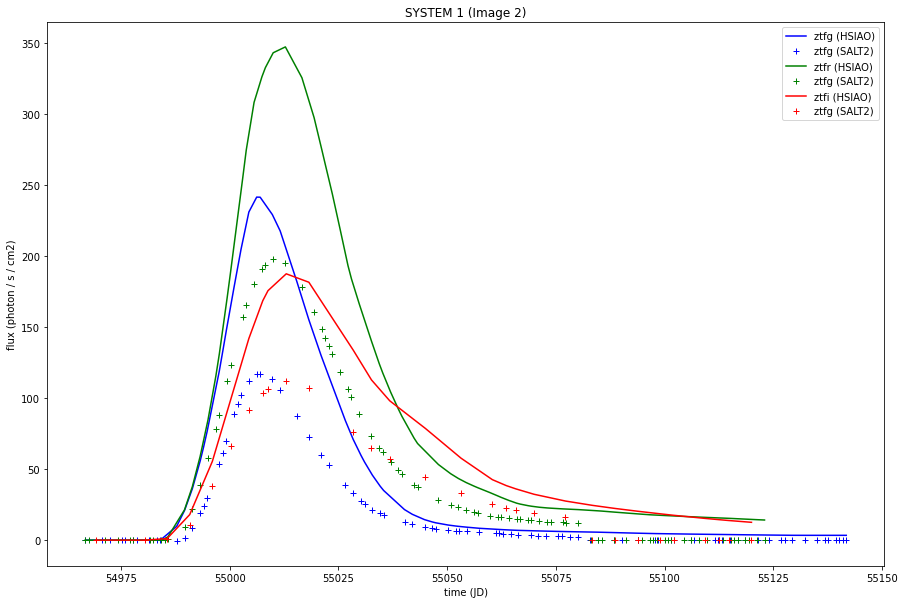

In [40]:
plt.figure(figsize=(15, 10))

# IMAGE 2
# ZTFG
plt.plot(timeS1B1H, fluxS1I2B1H, color='b', label = 'ztfg (HSIAO)')
plt.plot(timeS1B1, fluxS1I2B1, 'b+', label = 'ztfg (SALT2)')

#ZTGR
plt.plot(timeS1B2H, fluxS1I2B2H, color='green', label='ztfr (HSIAO)')
plt.plot(timeS1B2, fluxS1I2B2, 'g+', label = 'ztfg (SALT2)')

#ZTFI
plt.plot(timeS1B3H, fluxS1I2B3H, color='red', label='ztfi (HSIAO)')
plt.plot(timeS1B3, fluxS1I2B3, '+r', label = 'ztfg (SALT2)')

plt.title('SYSTEM 1 (Image 2)')
plt.xlabel('time (JD)')
plt.ylabel('flux (photon / s / cm2)')
plt.legend()
plt.show()